# Laboratory practice 2.1: Introduction to ML techniques
# Preparing the dataset

For this practice, you will need the following dataset:

- **SimData.dat**: synthetic datasets containing several input variables and one output variable **Y**.

One of the core packages for machine learning in Python is **scikit-learn**. However, most of the time you *will not be so lucky as to use it* other than to check your answers, since the main idea here is that **you** learn how to code each method and how/why it works. *This goes both for different algorithms as well as preprocessing and analysis techniques*.

Further reading on the scikit-learn library (this will be your best friend in the near future, but again, for now is just for reference):
- [scikit-learn](https://scikit-learn.org)

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
- Plotting (you do not have to use both, you can choose one or the other if you feel confortable):
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)


---

In [196]:
# Load the necessary modules

# plotting libraries (you can use only one, for example plt)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data management libraries (you'll need both here)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Machine learning libraries (just so you see how some things can be done, although you may not use it too much)
from sklearn.model_selection import train_test_split

---

## STEP 1: IMPORT DATASET

In [197]:
# For starters, load the dataset here into a pandas dataframe called "df" and check the first rows with .head()
df =pd.read_csv("SimData.dat", sep="\t")
df.head()

,X1,X2,Y
0,-64.170401,NaN,NO
1,604.457235,-4.703332,YES
2,492.688339,-0.493488,YES
3,438.040887,-2.307669,NO
4,184.349042,2.680303,NO


Is it a regression or a classification problem? Take into account that the target variable is "Y"

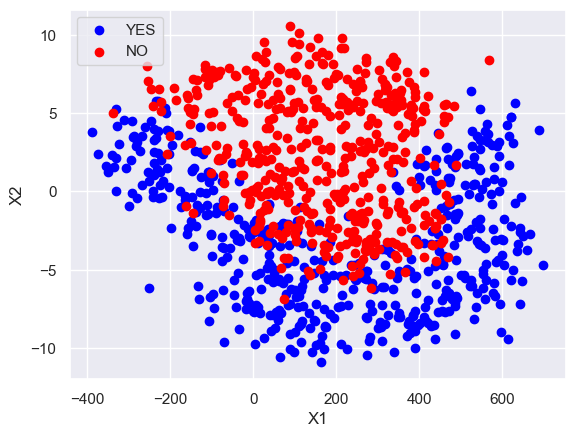

In [198]:
# Taking into account the shape of the dataset, plot it so that you can get acquainted with the data
# Make sure every class is distinguished using different colors and/or shapes in the plot
plt.figure()
plt.scatter(df.loc[df["Y"]=="YES", "X1"],df.loc[df["Y"]=="YES", "X2"], c="blue")
plt.scatter(df.loc[df["Y"]=="NO", "X1"],df.loc[df["Y"]=="NO", "X2"], c="red")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(["YES", "NO"])
plt.show()

## STEP 2: CHECK OUT THE MISSING VALUES

In [199]:
# Are there any missing values? How many? Where? 

df.isna().sum()

X1    2
X2    3
Y     1
dtype: int64

In [200]:
# In this case we will simply remove the missing values by removing the rows with NAs. Do this here.
df_limpio=df.dropna()
# Check results. Was your removal succesful?
df_limpio.isna().sum() #the removal was succesfull since there is no more na values in the dataset

X1    0
X2    0
Y     0
dtype: int64

## STEP 3: PLOT THE DATA AND CHECK OUT FOR OUTLIERS

In [201]:
# Check your main statistics for the data variables and see if everything is clear
df_limpio.describe()


,X1,X2
count,996.000000,996.000000
mean,183.233656,-0.348326
std,238.507874,4.939723
min,-388.231360,-10.936124
25%,13.424622,-4.105678
50%,180.989524,-0.416657
75%,369.618619,3.544763
max,697.909378,10.558342


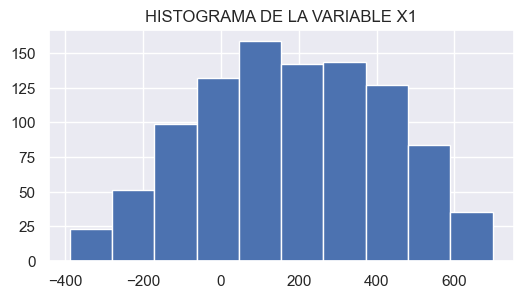

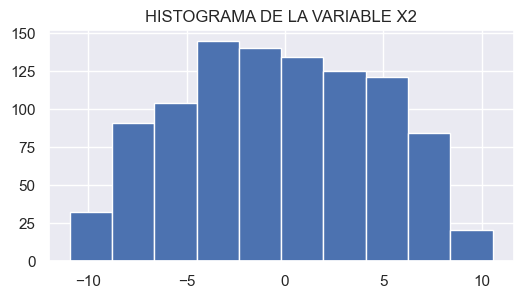

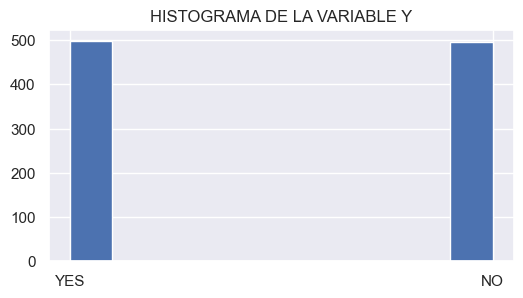

<Axes: >

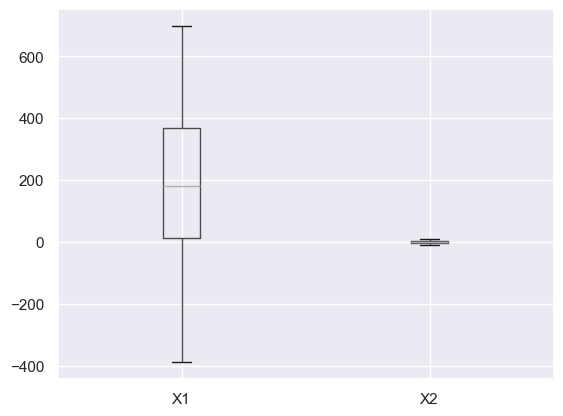

In [202]:
# Plotting is a good way to get to know the data. Do a histogram for each variable to see its behavior.
# Do you see any potential outliers you should take care of?
plt.figure(figsize=(6, 3))
plt.hist(df_limpio["X1"])
plt.title("HISTOGRAMA DE LA VARIABLE X1")
plt.show()

plt.figure(figsize=(6, 3))
plt.hist(df_limpio["X2"])
plt.title("HISTOGRAMA DE LA VARIABLE X2")
plt.show()

plt.figure(figsize=(6, 3))
plt.hist(df_limpio["Y"])
plt.title("HISTOGRAMA DE LA VARIABLE Y")
plt.show()

df_limpio.boxplot()

## STEP 4: ENCODE CATEGORICAL VARIABLES

In [203]:
# Are there any categorical input variables? If unsure, check it
"La variable Y es una variable categorica"

'La variable Y es una variable categorica'

In [204]:
# Convert output variable to a factor (other types of numeric values are okay as well, but we will use this here)
diccionario={"YES":1, "NO":0}
df_limpio.loc[:,"Y"]=df_limpio.loc[:,"Y"].apply(lambda x: diccionario[x])
df_limpio.head()

,X1,X2,Y
1,604.457235,-4.703332,1
2,492.688339,-0.493488,1
3,438.040887,-2.307669,0
4,184.349042,2.680303,0
5,557.127451,-3.632923,1


## STEP 5: Standardize the numerical variables

In [205]:
# Are the numerical variables in the same scale? If unsure, check it

df_limpio.loc[:,"X1"]=df_limpio.loc[:,"X1"].apply(lambda x: (x-df_limpio["X1"].mean())/df_limpio["X1"].std())
df_limpio.loc[:,"X2"]=df_limpio.loc[:,"X2"].apply(lambda x: (x-df_limpio["X2"].mean())/df_limpio["X2"].std())

The standardization should be done **after** we perform the train/test split, using only the mean and variance for the training dataset. In this case however, we will forget about this and just do it here, although this is something to keep in mind.

In [206]:
# Standardize the numerical variables. 
# Watch out!: Save the mean and variance so you can undo de standardization anytime you want to

media_x1=df_limpio["X1"].mean()
std_x1=df_limpio["X1"].std()
media_x2=df_limpio["X2"].mean()
std_x2=df_limpio["X2"].std()
df_limpio.loc[:,"X1"]=df_limpio.loc[:,"X1"].apply(lambda x: (x-media_x1)/std_x1)
df_limpio.loc[:,"X2"]=df_limpio.loc[:,"X2"].apply(lambda x: (x-media_x2)/std_x2)



<Axes: >

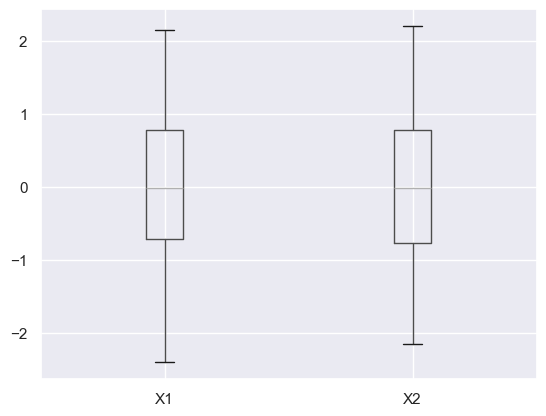

In [207]:
# Check if your process worked

df_limpio.head()
df_limpio.boxplot()

## STEP 6: EXPLORATORY ANALYSIS
Inside the exploratory analysis, feel free to play with the data to get to know it further. Some of the best ways to do so is plotting it, showing the correlation plot of numeric variables, etc.

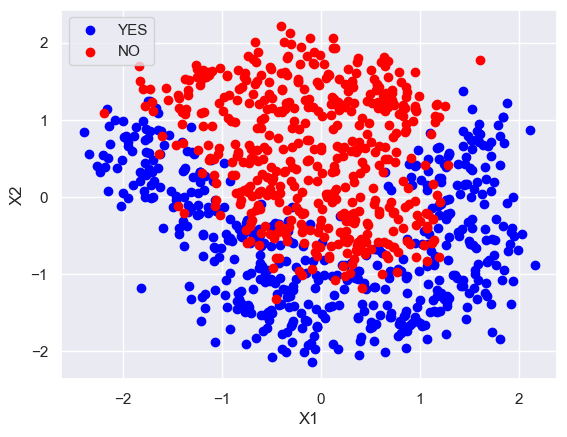

In [208]:
# Do again the scatterplot for the dataset, but now with the processed version

plt.figure()
plt.scatter(df_limpio.loc[df_limpio["Y"]==1, "X1"],df_limpio.loc[df_limpio["Y"]==1, "X2"], c="blue")
plt.scatter(df_limpio.loc[df_limpio["Y"]==0, "X1"],df_limpio.loc[df_limpio["Y"]==0, "X2"], c="red")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(["YES", "NO"])
plt.show()

c:\Users\Guill\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Guill\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Guill\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


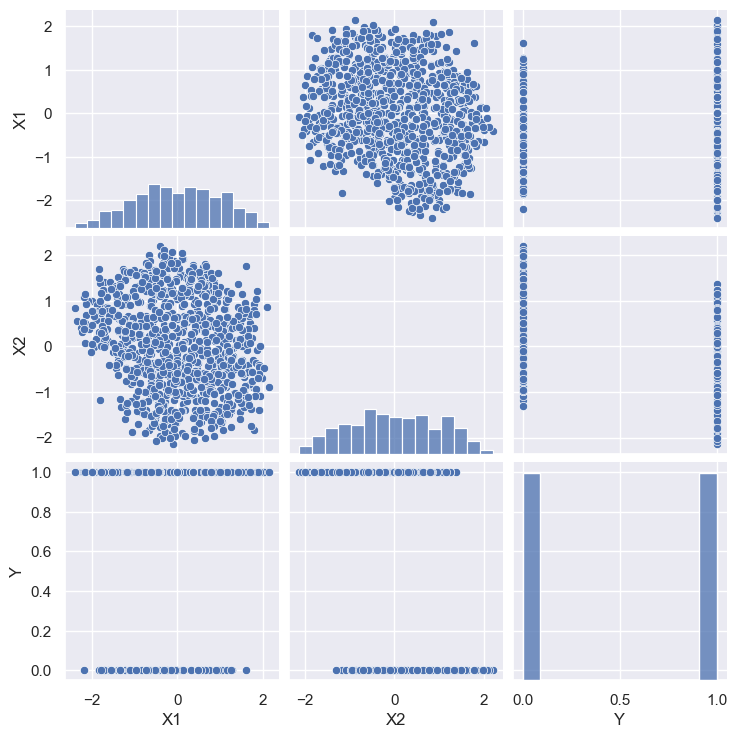

In [209]:
# One idea: perform a scatterplot where you face each variable against each other (all vs. all)
sns.pairplot(df_limpio)
plt.show()


In [210]:
# Obtain and plot the correlation matrix 
# For this, you may want to use the .corr() method in pandas
df_limpio.corr()


,X1,X2,Y
X1,1.000000,-0.189912,0.070976
X2,-0.189912,1.000000,-0.559032
Y,0.070976,-0.559032,1.000000


In [211]:
# Feel free to try any other exploration methods here!

## STEP 7: CHECK OUT FOR CLASS IMBALANCES

Are both classes balanced or not?

In [212]:
# Count instances for each class
df_limpio.groupby(by="Y").count()

,X1,X2
Y,,
0,497,497
1,499,499


If both classes are kind of similar in number, you can consider the dataset _balanced_

## STEP 8: SPLIT THE DATA INTO TRAINING AND TEST SETS

Now, this is a critical point, and you should watch out here. Doing this properly is not difficult, but mistakes are expensive in this step! (and also you most likely will not notice them until much later, when it's already very far too late)

In [213]:
# Define input and output variables
var_input=["X1","X2"]
var_output=["Y"]


In [214]:
# First: Shuffle the data (check out the .sample() method in pandas)
df_shuffled = df_limpio.sample(frac=1)

# Then, separate the inputs, stored in "X" (pd.dataframe) from the target variable, stored in "y" (pd.series)
x=df_shuffled[["X1","X2"]]
y=df_shuffled[["Y"]]


Now for the crucial part: Separate the train and test datasets. 

For now, consider only train/test (forget the validation dataset) and make it so that the training set contains 80% of the data and the test set the remaining 20%


In [215]:
# How many rows will the training dataset have?
x.shape

(996, 2)

In [216]:
# Perform the split

x_80=x.head(796)
y_80=y.head(796)
x_20=x.tail(200)
y_20=y.tail(200)

In [217]:
# Check whether the shape of all dataframes is correct

print(x_80.shape)
print(y_80.shape)
print(x_20.shape)
print(y_20.shape)

(796, 2)
(796, 1)
(200, 2)
(200, 1)


In [218]:
# See how convenient sklearn becomes here, for example...

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,  # percentage of test data
                                                    random_state=0, # seed for replication
                                                    stratify = y)   # Preserves distribution of y


### 8.1 - Plot the train and test datasets
We'll do this simple check to see if everything looks fine here

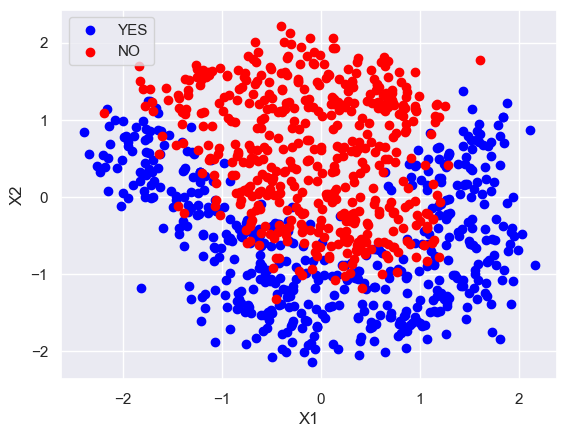

In [221]:
# To make plotting easier, group together train data and test data

df_agrupado_x=pd.concat([X_train,X_test])
df_agrupado_y=pd.concat([y_train,y_test])
df_agrupado = pd.concat([df_agrupado_x, df_agrupado_y], axis=1)



# Plot the train and test datasets
plt.figure()
plt.scatter(df_agrupado.loc[df_agrupado["Y"]==1, "X1"],df_agrupado.loc[df_agrupado["Y"]==1, "X2"], c="blue")
plt.scatter(df_agrupado.loc[df_agrupado["Y"]==0, "X1"],df_agrupado.loc[df_agrupado["Y"]==0, "X2"], c="red")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(["YES", "NO"])
plt.show()



In [222]:
# Store the train and test datasets to use it later

df_train=pd.concat([X_train, y_train], axis=1)
df_test=pd.concat([X_test, y_test], axis=1)
df_train.to_csv("train.dat", sep = "\t", index = False)
df_test.to_csv("test.dat", sep = "\t", index = False)

           X1        X2  Y
129 -1.333028  1.510050  0
995 -0.685081  1.785181  0
297 -1.170826  0.274829  1
42   0.510421 -1.621717  1
679 -0.158282 -1.593912  1


### **We are all set!** 

You can continue to the next practice, to start applying your first ML algorithm to the data: _K-nearest neighbors_

Also: any further checks of processing you think you need, feel free to try here!